<a href="https://colab.research.google.com/github/abeni-hub/Machine_Learning-Project-Collections/blob/main/Testing_model(Fruits_and_Vegetables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/train',
    labels='inferred',
    label_mode = "categorical",
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 1063 files belonging to 36 classes.


In [4]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/validation',
    labels='inferred',
    label_mode = "categorical",
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 351 files belonging to 36 classes.


In [5]:
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters = 64 , kernel_size = 3 , activation='relu',input_shape=[64,64,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2 , strides = 2))

In [6]:
cnn.add(tf.keras.layers.Conv2D(filters = 64 , kernel_size = 3 , activation='relu',input_shape=[64,64,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2 , strides = 2))

In [7]:
cnn.add(tf.keras.layers.Dropout(0.5)) #Used to avoid overfitting

In [8]:
cnn.add(tf.keras.layers.Flatten())

In [9]:
cnn.add(tf.keras.layers.Dense(units =128 ,activation='relu')) # To make a neurons
cnn.add(tf.keras.layers.Dense(units = 36 ,activation='softmax')) # To make output layers of the neuron

In [10]:
cnn.compile(optimizer = 'rmsprop',loss ='categorical_crossentropy' , metrics=['accuracy'])

In [11]:
training_history = cnn.fit(x = training_set , validation_data = validation_set , epochs = 30)

Epoch 1/30
34/34 [==============================] - 233s 6s/step - loss: 38.4114 - accuracy: 0.1167 - val_loss: 5.4206 - val_accuracy: 0.0912
Epoch 2/30
34/34 [==============================] - 42s 1s/step - loss: 3.3822 - accuracy: 0.1947 - val_loss: 7.4165 - val_accuracy: 0.1111
Epoch 3/30
34/34 [==============================] - 50s 1s/step - loss: 3.7195 - accuracy: 0.2324 - val_loss: 9.0170 - val_accuracy: 0.0969
Epoch 4/30
34/34 [==============================] - 54s 1s/step - loss: 4.3944 - accuracy: 0.2681 - val_loss: 35.5315 - val_accuracy: 0.0969
Epoch 5/30
34/34 [==============================] - 59s 2s/step - loss: 2.6501 - accuracy: 0.3716 - val_loss: 52.2106 - val_accuracy: 0.0969
Epoch 6/30
34/34 [==============================] - 44s 1s/step - loss: 5.0388 - accuracy: 0.3998 - val_loss: 59.0509 - val_accuracy: 0.0570
Epoch 7/30
34/34 [==============================] - 46s 1s/step - loss: 4.0023 - accuracy: 0.4807 - val_loss: 12.7900 - val_accuracy: 0.2707
Epoch 8/30
34/

In [13]:
cnn.save('trained_model.h5')

In [14]:
cnn = tf.keras.models.load_model('trained_model.h5')

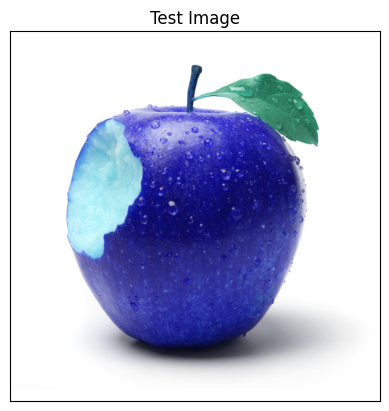

In [16]:
import cv2
image_path = '/content/drive/MyDrive/test/apple/Image_1.jpg'
image = cv2.imread(image_path)
plt.imshow(image)
plt.title("Test Image")
plt.xticks([])
plt.yticks([])
plt.show()

# Testing Model

In [19]:
image = tf.keras.preprocessing.image.load_img(image_path , target_size = (64,64))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
image = np.expand_dims(input_arr, axis =0)
predictions = cnn.predict(image)

1/1 [==============================] - 0s 120ms/step


In [24]:
print(predictions[0])
print(max(predictions[0]))

[2.3206334e-38 4.3624562e-38 3.9354798e-34 4.7057239e-31 3.8307695e-21
 2.0202991e-36 0.0000000e+00 0.0000000e+00 2.3497159e-32 1.2041728e-37
 4.3491966e-38 7.6325511e-31 2.6913032e-31 1.3381261e-35 5.7602091e-31
 2.2601254e-29 0.0000000e+00 0.0000000e+00 2.6379087e-32 1.9464040e-36
 1.6668079e-25 0.0000000e+00 8.7187288e-34 1.1608194e-03 6.2950536e-17
 1.0987288e-06 7.7385525e-04 3.6739232e-03 2.8354609e-02 1.0735479e-10
 1.4072704e-18 3.9257026e-12 9.6560341e-01 4.6628644e-05 2.9212272e-06
 3.8281293e-04]
0.9656034


In [21]:
testing_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/test',
    labels='inferred',
    label_mode = "categorical",
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 361 files belonging to 36 classes.


In [35]:
testing_set.class_names

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [36]:
#testing_set.class_names
result_index = np.where(predictions[0] == max(predictions[0]))
print(result_index[0][0])

32


6.0 255.0


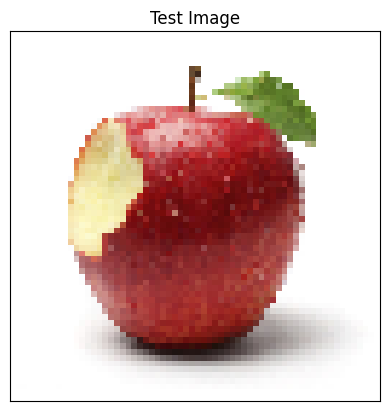

In [34]:
print(image.min(), image.max())
image = image /255.0
plt.imshow(image[0])
plt.title("Test Image")
plt.xticks([])
plt.yticks([])
plt.show()

In [38]:
# Single Prediction

print("It's a {}".format(testing_set.class_names[result_index[0][0]]))

It's a sweetpotato
